### 딥러닝시 런타임 유형 변경
- 런타임 -> 런타임 유형 변경 -> 하드웨어 가속기 -> GPU 선택


- Colab의 장점
  - Deeplearning을 수행하기 위한 환경세팅이 되어져 있어 번거로운 부분이 생략 가능하다 (ex, Cuda Setting)
  - 많이 사용하는 패키지들이 설치되어져 있고, 리눅스 기반의 노트북이므로 리눅스 명령어를 사용할 수 있다.
  - TPU, GPU등 비싼 장비들을 무료로 사용할 수 있다는 장점이 있다. 운이 좋으면 코랩 무료 버전에서도 GPU p100(vram 20GB)을 사용 가능


- Colab의 단점
  - 속도가 느리다(전 세계에서 사용하므로 어쩔 수 없는 부분 .. ㅠ)
  - 많이 사용되는 패키지 library, framework들이 있지만, 없는 것도 많음 따라서 설치를 해주어야 하는데, 설치 후 런타임이 초기화 되면 다시 설치를 해주어야한다.
  - 데이터도 Colab에서 다운받으면 런타임이 초기화 되면, 사라진다. 따라서 데이터를 구글드라이브 마운트롤 통해서 구글 드라이브에 저장해야한다.
  - 런타임 유지 시간이 무료 버전의 경우 12시간
  - 유료 버전은 24시간 유료 버전을 쓰더라고 일정 시간 입력이 없을 경우 런타임 이 끊김


- Colab 런타임 유지 방법
  - https://hanryang1125.tistory.com/31
  - F12를 누르고 Console에 해당 링크에서 연결 유지 함수를 입력
  - 학습시에는 방해가 될 수 있으므로 출력 삭제 코드 입력


- 다른 버전의 코랩
  - 현재 국내에서는 정식 출시 되지 않음
  - 더 긴 런타임을 사용하기 위해서는 과금이 필요
  - colab pro(유료) - 1달에 1 ~ 1만 4천원 정도, colab pro+(유료) 1달에 - 5만원 이상
  ![nn](./image_files/colab.png)


- Colab 사용시 주의사항 런타임 초기화와 런타임 끊기는 것에 대해서 조심하자

In [24]:
!pwd

/media/bgw2001/One Touch/study/Chest_X_Ray_Images/CNN_Tutorial


### GPU 확인하기

In [ ]:
!nvidia-smi

Mon Sep  6 01:58:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 데이터 다운로드 주소: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
- 데이터 다운로드 후 구글 드라이브에 업로드 파일의 크기가 커서 zip 형태로 업로드 후 압축해제

In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/archive.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/tra

### 데이터 다운로드 후 해당 경로에 있는 파일 확인
- 구글 드라이브에는 동기화 때문에 나중에 확인 가능

In [ ]:
!ls /content/drive/MyDrive/Colab_Notebooks/chest_xray/train/NORMAL

IM-0115-0001.jpeg		NORMAL2-IM-0478-0001.jpeg
IM-0117-0001.jpeg		NORMAL2-IM-0479-0001.jpeg
IM-0119-0001.jpeg		NORMAL2-IM-0480-0001.jpeg
IM-0122-0001.jpeg		NORMAL2-IM-0481-0001.jpeg
IM-0125-0001.jpeg		NORMAL2-IM-0482-0001.jpeg
IM-0127-0001.jpeg		NORMAL2-IM-0485-0001.jpeg
IM-0128-0001.jpeg		NORMAL2-IM-0486-0001.jpeg
IM-0129-0001.jpeg		NORMAL2-IM-0487-0001.jpeg
IM-0131-0001.jpeg		NORMAL2-IM-0488-0001.jpeg
IM-0133-0001.jpeg		NORMAL2-IM-0489-0001.jpeg
IM-0135-0001.jpeg		NORMAL2-IM-0490-0001.jpeg
IM-0137-0001.jpeg		NORMAL2-IM-0491-0001.jpeg
IM-0140-0001.jpeg		NORMAL2-IM-0493-0001.jpeg
IM-0141-0001.jpeg		NORMAL2-IM-0496-0001.jpeg
IM-0143-0001.jpeg		NORMAL2-IM-0497-0001.jpeg
IM-0145-0001.jpeg		NORMAL2-IM-0499-0001.jpeg
IM-0147-0001.jpeg		NORMAL2-IM-0500-0001.jpeg
IM-0149-0001.jpeg		NORMAL2-IM-0501-0001.jpeg
IM-0151-0001.jpeg		NORMAL2-IM-0502-0001.jpeg
IM-0152-0001.jpeg		NORMAL2-IM-0503-0001.jpeg
IM-0154-0001.jpeg		NORMAL2-IM-0506-0001.jpeg
IM-0156-0001.jpeg		NORMAL2-IM-0507-0001.jpeg
IM-0158-00

### 데이터 프레임 만들기
만드는 이유:
- 데이터를 잘 관리하기 위해서 .. ? 
- 이미지 데이터의 경로를 저장해서 해당 경로에 있는 데이터들을 for문을 이용해서 가져올 수 있기 때문에도 있다.

In [1]:
#경로를 가져올 library load
from glob import glob

In [2]:
train_path = glob("/media/bgw2001/One Touch/study/Chest_X_Ray_Images/chest_xray/train/*/*.jpeg")
train_path[len(train_path) - 10:]

['/media/bgw2001/One Touch/study/Chest_X_Ray_Images/chest_xray/train/PNEUMONIA/person996_virus_1677.jpeg',
 '/media/bgw2001/One Touch/study/Chest_X_Ray_Images/chest_xray/train/PNEUMONIA/person997_bacteria_2926.jpeg',
 '/media/bgw2001/One Touch/study/Chest_X_Ray_Images/chest_xray/train/PNEUMONIA/person997_virus_1678.jpeg',
 '/media/bgw2001/One Touch/study/Chest_X_Ray_Images/chest_xray/train/PNEUMONIA/person998_bacteria_2927.jpeg',
 '/media/bgw2001/One Touch/study/Chest_X_Ray_Images/chest_xray/train/PNEUMONIA/person998_bacteria_2928.jpeg',
 '/media/bgw2001/One Touch/study/Chest_X_Ray_Images/chest_xray/train/PNEUMONIA/person99_virus_183.jpeg',
 '/media/bgw2001/One Touch/study/Chest_X_Ray_Images/chest_xray/train/PNEUMONIA/person9_bacteria_38.jpeg',
 '/media/bgw2001/One Touch/study/Chest_X_Ray_Images/chest_xray/train/PNEUMONIA/person9_bacteria_39.jpeg',
 '/media/bgw2001/One Touch/study/Chest_X_Ray_Images/chest_xray/train/PNEUMONIA/person9_bacteria_40.jpeg',
 '/media/bgw2001/One Touch/study/

### 라벨데이터 가져오기
- binary Classification의 주제
  - NORMAL과 PNEUMONIA를 분류

In [3]:
import pandas as pd

label = []
for p in train_path:
    label.append(p.split("/")[len(p.split("/"))-2])

train_data= pd.DataFrame({"label":label,
                          "path":train_path})
train_data.head()

,label,path
0,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
1,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
2,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
3,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
4,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...


### test data set도 동일하게 진행

In [4]:
test_path = glob("/media/bgw2001/One Touch/study/Chest_X_Ray_Images/chest_xray/test/*/*.jpeg")


test_label = []
for p in test_path:
    test_label.append(p.split("/")[len(p.split("/"))-2])

test_data= pd.DataFrame({"label":test_label,
                          "path":test_path})

In [5]:
test_data.head()

,label,path
0,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
1,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
2,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
3,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
4,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...


In [6]:
val_path = glob("/media/bgw2001/One Touch/study/Chest_X_Ray_Images/chest_xray/val/*/*.jpeg")


val_label = []
for p in val_path:
    val_label.append(p.split("/")[len(p.split("/"))-2])

val_data= pd.DataFrame({"label":val_label,
                          "path":val_path})

In [7]:
val_data.head()

,label,path
0,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
1,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
2,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
3,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
4,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...


### Concat으로 train data set과 val data set을 하나로 Join을 하였다
  - 생각보다 너무 데이터 양이 적어서 train data에 merge함

In [8]:
train_data = pd.concat([train_data, val_data], axis = 0)
train_data.head()

,label,path
0,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
1,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
2,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
3,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
4,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...


In [9]:
train_data.to_csv("/media/bgw2001/One Touch/study/Chest_X_Ray_Images/train_df.csv" ,index = False)
test_data.to_csv("/media/bgw2001/One Touch/study/Chest_X_Ray_Images/test_df.csv" ,index = False)

In [10]:
print("train_data shape:",train_data.shape)
print("test_data shape:",test_data.shape)

train_data shape: (5232, 2)
test_data shape: (624, 2)


### 데이터 Load 후 저장이 잘 되었는지 확인

In [1]:
import pandas as pd

train_df = pd.read_csv("/media/bgw2001/One Touch/study/Chest_X_Ray_Images/train_df.csv")
test_df = pd.read_csv("/media/bgw2001/One Touch/study/Chest_X_Ray_Images/test_df.csv")

print("train_df shape:",train_df.shape)
print("test_df shape:",test_df.shape)

train_df shape: (5232, 2)
test_df shape: (624, 2)


### EDA

### 이미지 데이터 불러오기
- 오래 걸림 .. ㅠ
- 상황에 따라서 금방 실행됨
- 가능하면 로컬 또는 개인 서버에서 실행하는 것이 좋음(Nividia 그래픽)

In [12]:
import cv2

train_imgs = [cv2.resize(cv2.imread(x), (64,64)) for x in train_df['path'].tolist()]

### label 데이터 encoding

In [13]:
train_label_encoding = []
for i in train_df['label'].tolist():
    if i == 'NORMAL':
        train_label_encoding.append(0)
    else:
        train_label_encoding.append(1)

### 인코딩된 Label과 train data set의 모양 확인

In [14]:
import numpy as np

print("Train Data set의 Shape:",np.asarray(train_imgs).shape)
print("Train Set label Count:", len(train_label_encoding))

Train Data set의 Shape: (5232, 64, 64, 3)
Train Set label Count: 5232


### Simple CNN Model 만들기

## CNN
- Convolutional Neural Network의 약자로 다음과 같은 구조를 같습니다.
![nn](./image_files/head.png)



- CNN은 주로 Convolution층과 Pooling층으로 이루어져 있다.
- Convolution의 연산은 다음과 같이 이루어 진다.

![SegmentLocal](./image_files/Convolution_schematic.gif "segment")
![nn](./image_files/conv.png)

- 위에 이미지에서 살펴보면 input에 해당하는 이미지에 Filter가 옆으로 한 칸씩(stride =2 가되면 2칸씩 이동 여기선 1이라고 가정)이동하게 된다. 만약 위에 이미지 처럼 Filter가 멈추어져 있는 곳에 합성곱의 계산을 수행하면 (1 x 1) + (0 x 0) + (0 x 0) + (1 x 0) + (1 x 1) + (1 x 1) + (0 x 1) + (1 x 1) + (0 x 1) = 4로 위에 이미지 처럼 Feature Map의 한 칸에 4라는 값이 입력되게 된다. 그 후 한칸 이동 후 같은 방법을 반복적으로 수행해서 다음과 같이 Feature Map을 채우게 된다. 

![nn](./image_files/maxpulling.png)

- 다음은 Pooling 층이다 Pooling은 크게 MaxPooling과 Average Pooling으로 나누어지고, Activation Map에 있는 각 영의의 값의 최댓 값을 가져오는 것을 MaxPooling이라하고, 평균 값을 가져오는 것을 Average Pooling이라한다.

- Convolution layer의 output 값을 Feature Map 또는 Activation Map이라 부릅니다.

In [15]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

2021-09-06 11:33:30.838587: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-06 11:33:30.838628: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### 모델 성능 측정에 필요한 recall, precision, f1 score에 대한 함수 정의

In [16]:
def recall(y_target, y_pred):
    y_target_yn = K.round(K.clip(y_target, 0, 1)) 
    y_pred_yn = K.round(K.clip(y_pred, 0, 1))

    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    count_true_positive_false_negative = K.sum(y_target_yn)

    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())
    return recall


def precision(y_target, y_pred):
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) 
    y_target_yn = K.round(K.clip(y_target, 0, 1)) 
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 
    count_true_positive_false_positive = K.sum(y_pred_yn)
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    return _f1score

### Simple CNN Model

In [17]:
np.random.seed(3)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (64,64,3)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['acc', recall, precision, f1score])

2021-09-06 11:33:37.531465: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-06 11:33:37.533035: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-06 11:33:37.533209: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-09-06 11:33:37.533389: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-09-06 11:33:37.561065: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         1

### image 데이터의 값의 법위를 0 ~ 255에서 0 ~ 1 사이의 값으로 **변경**

In [19]:
train = np.asarray(train_imgs)
train = train / 255.

In [20]:
train.shape

(5232, 64, 64, 3)

In [21]:
y_train = np.asarray(train_label_encoding)

### Data Training 

In [22]:
history = model.fit(train, y_train, epochs=40, batch_size = 50, validation_split = 0.4)

2021-09-06 11:33:51.673245: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
63/63 [==============================] - 7s 102ms/step - loss: 0.7202 - acc: 0.6448 - recall: 0.7851 - precision: 0.6403 - f1score: 0.6702 - val_loss: 0.2868 - val_acc: 0.9685 - val_recall: 0.9712 - val_precision: 0.9964 - val_f1score: 0.9832
Epoch 2/40
63/63 [==============================] - 6s 99ms/step - loss: 0.4062 - acc: 0.8299 - recall: 0.8608 - precision: 0.8716 - f1score: 0.8470 - val_loss: 0.6785 - val_acc: 0.7095 - val_recall: 0.7078 - val_precision: 1.0000 - val_f1score: 0.8273
Epoch 3/40
63/63 [==============================] - 6s 99ms/step - loss: 0.2416 - acc: 0.8996 - recall: 0.9069 - precision: 0.9275 - f1score: 0.9112 - val_loss: 0.4493 - val_acc: 0.8251 - val_recall: 0.8244 - val_precision: 0.9991 - val_f1score: 0.9025
Epoch 4/40
63/63 [==============================] - 6s 99ms/step - loss: 0.1655 - acc: 0.9372 - recall: 0.9440 - precision: 0.9512 - f1score: 0.9450 - val_loss: 0.1727 - val_acc: 0.9365 - val_recall: 0.9375 - val_precision: 0.9980 - val_f1s

### GPU 사용량 확인하기

### 모델 검증하기 위한 test set data 불러오기

In [23]:
test_imgs = [cv2.resize(cv2.imread(x), (64,64)) for x in test_df['path'].tolist()]

test_label_encoding = []
for i in test_df['label'].tolist():
    if i == 'NORMAL':
        test_label_encoding.append(0)
    else:
        test_label_encoding.append(1)

test = np.asarray(test_imgs)
test = test/255.

y_test = np.asarray(test_label_encoding)

### 모델 검증

In [24]:
A = model.evaluate(test, y_test)

20/20 [==============================] - 0s 12ms/step - loss: 2.1446 - acc: 0.8237 - recall: 0.6422 - precision: 0.6393 - f1score: 0.6400 


### 예측

In [25]:
A = model.predict(test)

In [26]:
A

array([[2.94991969e-05],
       [5.41338921e-01],
       [2.56540775e-01],
       [6.64845109e-03],
       [2.07964376e-06],
       [1.22296470e-07],
       [5.68371661e-07],
       [9.11355019e-04],
       [2.98123956e-02],
       [1.51134782e-06],
       [2.70636865e-05],
       [9.93939996e-01],
       [7.36354291e-02],
       [3.79795056e-05],
       [9.96295571e-01],
       [5.71222723e-01],
       [1.31139159e-03],
       [5.67050620e-07],
       [1.33687950e-12],
       [9.13726180e-05],
       [9.99929070e-01],
       [4.97855186e-01],
       [1.89301261e-07],
       [2.87573457e-05],
       [3.57385576e-02],
       [4.94752885e-06],
       [2.34229267e-02],
       [3.90657783e-03],
       [1.00000000e+00],
       [9.99987841e-01],
       [9.99844968e-01],
       [4.12604213e-03],
       [2.24211514e-01],
       [2.50468674e-05],
       [9.93998528e-01],
       [9.34639513e-01],
       [2.98556463e-21],
       [1.33782579e-12],
       [6.74536641e-05],
       [3.45228979e-09],


### Threshold 값을 0.5해서 예측 확률이 0.5보다 크면 1, 작으면 0하고, 디코딩 실행

In [27]:
len(A)
pred = []

for i in range(len(A)):
    score = A[i][0]
    if score > 0.5:
        pred.append(1)
    else:
        pred.append(0)
pred[:10]

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [28]:
decoding = []

for i in pred[:10]:
    if i == 0:
        decoding.append("NORMAL")
    else:
        decoding.append("PNEUMONIA")
decoding

['NORMAL',
 'PNEUMONIA',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL',
 'NORMAL']

### 예측 결과 확인

In [29]:
test_df[:10]

,label,path
0,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
1,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
2,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
3,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
4,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
5,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
6,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
7,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
8,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...
9,NORMAL,/media/bgw2001/One Touch/study/Chest_X_Ray_Ima...


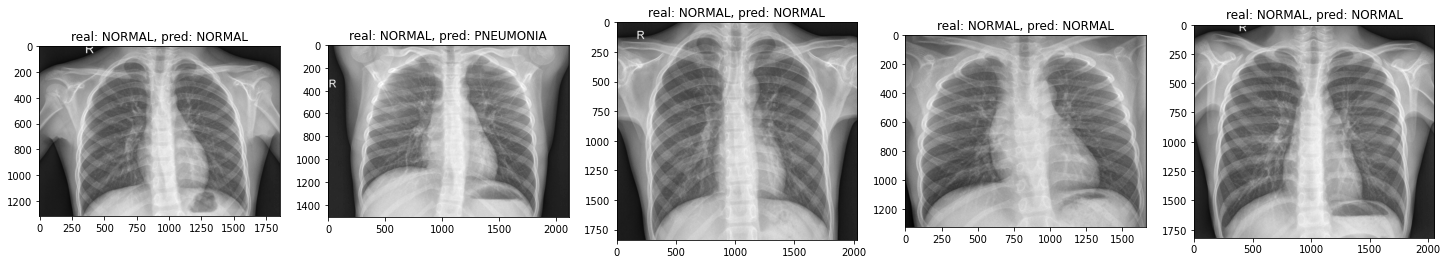

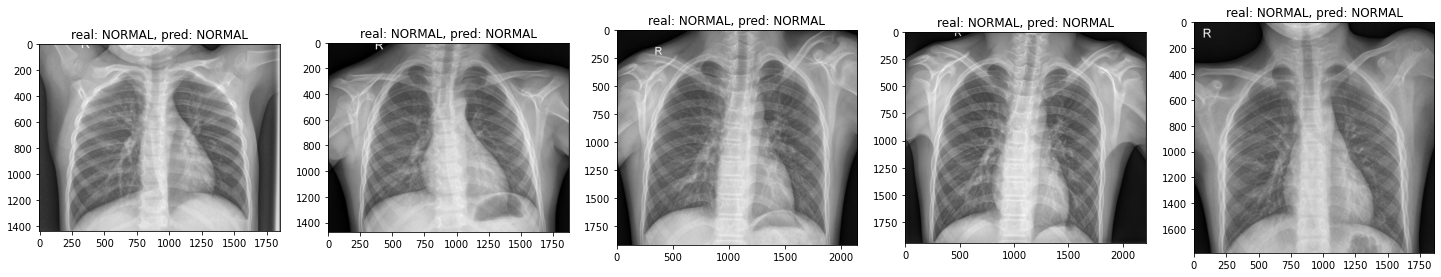

In [30]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

img_p = test_df['path'].tolist()
fig, axs = plt.subplots(figsize = (25, 6), ncols = 5)
for i in range(5):
    img = cv2.imread(img_p[i], cv2.COLOR_BGR2RGB)
    axs[i].imshow(img, cmap = 'gray')
    axs[i].set_title("real: %s, pred: %s" % ("NORMAL",decoding[i]))

fig, axs = plt.subplots(figsize = (25, 6), ncols = 5)
for i in range(5):
    img = cv2.imread(img_p[i + 5], cv2.COLOR_BGR2RGB)
    axs[i].imshow(img, cmap = 'gray')
    axs[i].set_title("real: %s, pred: %s" % ("NORMAL",decoding[i + 5]))

### 각각의 acc, loss, recall, precision, f1socre에 대한 그래프 

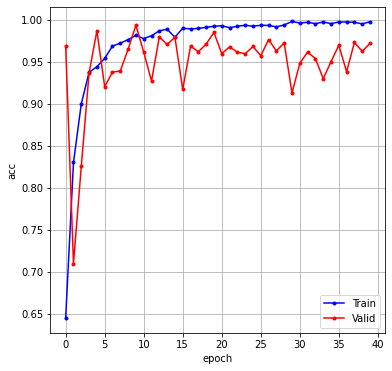

In [31]:
y_acc = history.history['acc']
val_acc = history.history['val_acc']

x_len = np.arange(len(y_acc))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_acc, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_acc, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()

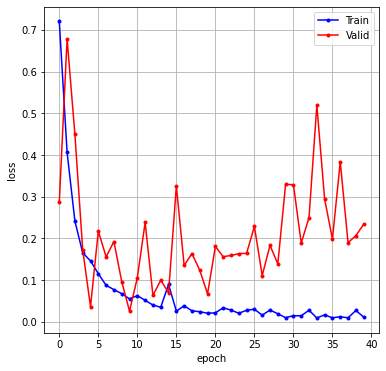

In [32]:
y_loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(y_loss))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_loss, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_loss, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

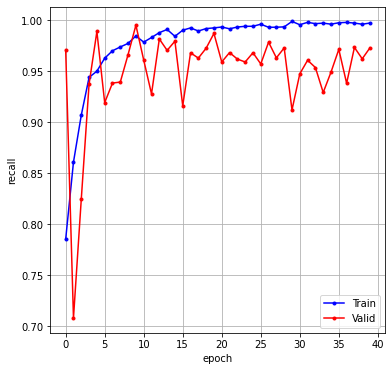

In [33]:
y_recall = history.history['recall']
val_recall = history.history['val_recall']

x_len = np.arange(len(y_recall))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_recall, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_recall, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("recall")
plt.show()

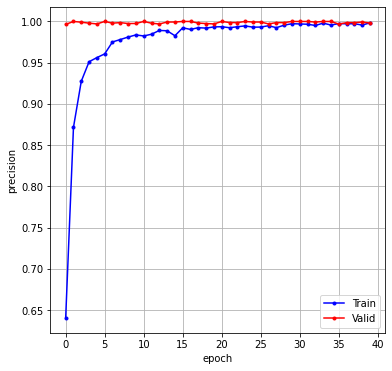

In [34]:
y_precision = history.history['precision']
val_precision = history.history['val_precision']

x_len = np.arange(len(y_recall))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_precision, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_precision, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("precision")
plt.show()

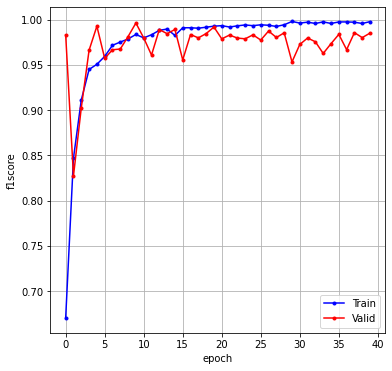

In [35]:
y_f1score = history.history['f1score']
val_f1score = history.history['val_f1score']

x_len = np.arange(len(y_recall))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_f1score, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_f1score, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("f1score")
plt.show()

### Model Save

In [ ]:
model.save("Chest_X_Ray_C.h5")

### EfficientNet

### CNN에서 모델을 확장하는 방법에 대해서 다시 한 번 생각해보자 - EfficientNet
- EfficientNet이란 모델의 사이즈는 작으나 Inference 속도가 빠르고 정확도가 높아 효율적인 모델 ~!!
- EfficientNet은 적은 파라미터이지만 다른 Resnet등과 같은 모델에 비해서 좋은 성능을 나타낸다.

- 모델의 성능을 높이는 방법에는 크게 3가지 방법이 있다.
    - width Scaling : 필터의 개수를 늘린다.(64 -> 128 -> 256)
    - Depth Scaling : 모델의 layer의 갯수를 늘린다.
    - Resolution Scaling : Input 이미지의 해상도를 늘려서 넣는다.(256x256의 이미지를 512x512의 크기로 확장해서 넣는다.)
    
- 그동안 사람들은 width Scaling만 조정하거나 Depth Scaling만 조정해서 모델의 성능을 올렸으나 EfficientNet은 3가지의 방법을 적절히 조합해서 월등한 성능을 이끌어냄

In [11]:
import pandas as pd
import cv2

train_df = pd.read_csv("/media/bgw2001/One Touch/study/Chest_X_Ray_Images/train_df.csv")
test_df = pd.read_csv("/media/bgw2001/One Touch/study/Chest_X_Ray_Images/test_df.csv")

train_imgs = [cv2.resize(cv2.imread(x), (224,224)) for x in train_df['path'].tolist()]

train_label_encoding = []
for i in train_df['label'].tolist():
    if i == 'NORMAL':
        train_label_encoding.append(0)
    else:
        train_label_encoding.append(1)

In [13]:
train_x = np.asarray(train_imgs)
train_y = np.asarray(train_label_encoding)

In [14]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

from keras import backend as K
from tensorflow.keras.applications import efficientnet as ef
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomRotation, RandomTranslation
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom, RandomFlip

2021-09-10 01:14:29.354499: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-10 01:14:29.354537: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


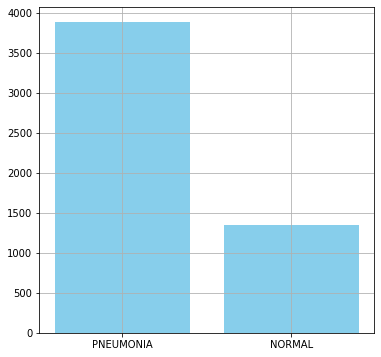

데이터가 언벨런스함
PNEUMONIA가 3883개에 비해 NORMAL은 1349 정도 밖에 되지 않음


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

A = train_df['label'].value_counts()
A = pd.DataFrame(A)
A = A.reset_index()

plt.figure(figsize = (6,6))
plt.bar(A['index'],A['label'], color = 'skyblue')
plt.grid()
plt.show()

print("데이터가 언벨런스함")
print("PNEUMONIA가 3883개에 비해 NORMAL은 1349 정도 밖에 되지 않음")

## Image augmentation

In [16]:
SEED = 123
data_augmentation = tf.keras.Sequential([
    RandomRotation(0.02, seed=SEED),
    RandomTranslation(0.1, 0.1, seed=SEED),
    RandomZoom(0.33, seed=SEED),
    RandomFlip(mode="horizontal", seed=SEED),
])

2021-09-10 01:14:37.524884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-10 01:14:37.525524: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-10 01:14:37.525615: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-09-10 01:14:37.525687: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-09-10 01:14:37.550519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [17]:
## keras function으로 Layer 쌓기
def build_model():
    inp = Input((224, 224, 3))
    
    #값의 범위 -1 ~ 1 상의 값으로 설정
    x =  Rescaling(1./127.5, offset=-1)(inp)
    x = data_augmentation(x)
    
    # include_top 네트워크의 상단을 완전연결(Fully Conected layer) 할 경우 True, 아닐 경우 False
    # weights는 이미지 넷 가중치를 사용
    # input_tensor 모델에 입력 데이터로 사용할 텐서
    # input_shape input image의 모양
    # Fully Conected layer란 모델의 마지막에 Flattne()으로 2D 이미지를 1D 이미지로 펴주고,
    # 마지막에 Dense 층에서 "sigmoid"함수로 예측할 때 까지가 Fully Conected layer이다.
    efc = ef.EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights = "imagenet", input_tensor =x)
    
    efc.trainable = False
    
    x = tf.keras.layers.GlobalAveragePooling2D()(efc.output)
    x = tf.keras.layers.Dropout(0.32)(x)
    
    # elu(지수 선형 유닛) relu 와 비슷
    # x >= 0인 경우 f(x) = x
    # x < 0인 경우 f(x) =  alpha * (exp(x) - 1.)
    x = tf.keras.layers.Dense(64, activation="elu")(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    x = tf.keras.layers.Dense(32, activation="elu")(x)

    # 0을 중심으로 stddev = sqrt(2 / fan_in) 표준편차를 가지는 정규분포를 통해 샘플을 생성
    # 평균을 0이고 표준편차는 stddev = sqrt(2 / fan_in)을 가지는 샘플을 만듬
    # fan_in은 입력 값의 갯수를 의미
    y = tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="he_normal")(x)
    
    model = tf.keras.Model(inputs=inp, outputs=y)
    
    return model
model = build_model()

In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
sequential (Sequential)         (None, 224, 224, 3)  0           rescaling[0][0]                  
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           sequential[0][0]                 
______________________________________________________________________________________________

In [19]:

def recall(y_target, y_pred):
    y_target_yn = K.round(K.clip(y_target, 0, 1)) 
    y_pred_yn = K.round(K.clip(y_pred, 0, 1))

    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    count_true_positive_false_negative = K.sum(y_target_yn)

    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())
    return recall


def precision(y_target, y_pred):
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) 
    y_target_yn = K.round(K.clip(y_target, 0, 1)) 
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 
    count_true_positive_false_positive = K.sum(y_pred_yn)
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    return _f1score

In [20]:
model.compile(optimizer="adam",
             loss = "binary_crossentropy",
             metrics = ['acc', recall, precision, f1score])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
sequential (Sequential)         (None, 224, 224, 3)  0           rescaling[0][0]                  
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           sequential[0][0]                 
______________________________________________________________________________________________

In [23]:
history = model.fit(train_x, train_y, epochs=300, batch_size = 50, validation_split = 0.4)

Epoch 1/300
63/63 [==============================] - 112s 2s/step - loss: 0.6843 - acc: 0.5696 - recall: 0.9928 - precision: 0.5715 - f1score: 0.7228 - val_loss: 0.5635 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1score: 0.9977
Epoch 2/300
63/63 [==============================] - 113s 2s/step - loss: 0.6842 - acc: 0.5728 - recall: 0.9568 - precision: 0.5787 - f1score: 0.7137 - val_loss: 0.6551 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1score: 0.9977
Epoch 3/300
63/63 [==============================] - 109s 2s/step - loss: 0.6851 - acc: 0.5616 - recall: 0.9078 - precision: 0.5804 - f1score: 0.6903 - val_loss: 0.5434 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1score: 0.9977
Epoch 4/300
63/63 [==============================] - 113s 2s/step - loss: 0.6853 - acc: 0.5741 - recall: 0.9984 - precision: 0.5737 - f1score: 0.7252 - val_loss: 0.5231 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_

63/63 [==============================] - 102s 2s/step - loss: 0.6808 - acc: 0.5715 - recall: 0.9941 - precision: 0.5730 - f1score: 0.7240 - val_loss: 0.4594 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1score: 0.9977
Epoch 66/300
63/63 [==============================] - 102s 2s/step - loss: 0.6823 - acc: 0.5718 - recall: 0.9974 - precision: 0.5726 - f1score: 0.7254 - val_loss: 0.4883 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1score: 0.9977
Epoch 67/300
63/63 [==============================] - 102s 2s/step - loss: 0.6827 - acc: 0.5728 - recall: 0.9953 - precision: 0.5731 - f1score: 0.7247 - val_loss: 0.4962 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1score: 0.9977
Epoch 68/300
63/63 [==============================] - 103s 2s/step - loss: 0.6807 - acc: 0.5725 - recall: 0.9992 - precision: 0.5725 - f1score: 0.7259 - val_loss: 0.5576 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1score: 

63/63 [==============================] - 103s 2s/step - loss: 0.6731 - acc: 0.5804 - recall: 0.9030 - precision: 0.5857 - f1score: 0.7086 - val_loss: 0.5148 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1score: 0.9977
Epoch 130/300
63/63 [==============================] - 103s 2s/step - loss: 0.6702 - acc: 0.5820 - recall: 0.8874 - precision: 0.5901 - f1score: 0.7057 - val_loss: 0.5291 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1score: 0.9977
Epoch 131/300
63/63 [==============================] - 103s 2s/step - loss: 0.6734 - acc: 0.5776 - recall: 0.8975 - precision: 0.5871 - f1score: 0.7057 - val_loss: 0.4619 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1score: 0.9977
Epoch 132/300
63/63 [==============================] - 104s 2s/step - loss: 0.6732 - acc: 0.5849 - recall: 0.9032 - precision: 0.5922 - f1score: 0.7108 - val_loss: 0.5895 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1scor

63/63 [==============================] - 106s 2s/step - loss: 0.6656 - acc: 0.5986 - recall: 0.8690 - precision: 0.6038 - f1score: 0.7090 - val_loss: 0.5117 - val_acc: 0.9895 - val_recall: 0.9932 - val_precision: 0.9957 - val_f1score: 0.9943
Epoch 194/300
63/63 [==============================] - 105s 2s/step - loss: 0.6674 - acc: 0.5887 - recall: 0.8468 - precision: 0.6009 - f1score: 0.6997 - val_loss: 0.5512 - val_acc: 0.9876 - val_recall: 0.9908 - val_precision: 0.9962 - val_f1score: 0.9934
Epoch 195/300
63/63 [==============================] - 105s 2s/step - loss: 0.6627 - acc: 0.6008 - recall: 0.8609 - precision: 0.6092 - f1score: 0.7089 - val_loss: 0.5948 - val_acc: 0.9565 - val_recall: 0.9595 - val_precision: 0.9960 - val_f1score: 0.9772
Epoch 196/300
63/63 [==============================] - 105s 2s/step - loss: 0.6676 - acc: 0.5932 - recall: 0.8731 - precision: 0.6014 - f1score: 0.7073 - val_loss: 0.5090 - val_acc: 0.9914 - val_recall: 0.9951 - val_precision: 0.9957 - val_f1scor

63/63 [==============================] - 109s 2s/step - loss: 0.6594 - acc: 0.6021 - recall: 0.8477 - precision: 0.6111 - f1score: 0.7069 - val_loss: 0.4929 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1score: 0.9977
Epoch 258/300
63/63 [==============================] - 114s 2s/step - loss: 0.6617 - acc: 0.6027 - recall: 0.8804 - precision: 0.6050 - f1score: 0.7144 - val_loss: 0.5658 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1score: 0.9977
Epoch 259/300
63/63 [==============================] - 112s 2s/step - loss: 0.6601 - acc: 0.6011 - recall: 0.8447 - precision: 0.6102 - f1score: 0.7043 - val_loss: 0.4559 - val_acc: 0.9962 - val_recall: 1.0000 - val_precision: 0.9958 - val_f1score: 0.9977
Epoch 260/300
63/63 [==============================] - 107s 2s/step - loss: 0.6677 - acc: 0.5903 - recall: 0.8507 - precision: 0.6017 - f1score: 0.6991 - val_loss: 0.5549 - val_acc: 0.9943 - val_recall: 0.9980 - val_precision: 0.9957 - val_f1scor

In [25]:
test_imgs = [cv2.resize(cv2.imread(x), (224,224)) for x in test_df['path'].tolist()]

test_label_encoding = []
for i in test_df['label'].tolist():
    if i == 'NORMAL':
        test_label_encoding.append(0)
    else:
        test_label_encoding.append(1)

test = np.asarray(test_imgs)
test = test/255.

y_test = np.asarray(test_label_encoding)

In [26]:
A = model.evaluate(test, y_test)

20/20 [==============================] - 13s 583ms/step - loss: 0.6692 - acc: 0.6250 - recall: 0.6500 - precision: 0.6344 - f1score: 0.6407


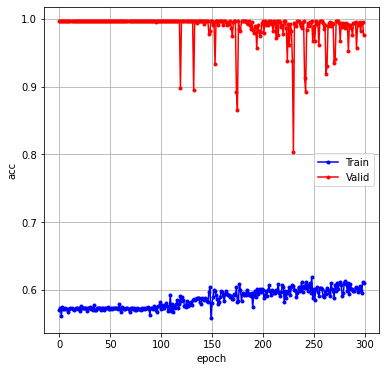

In [27]:
y_acc = history.history['acc']
val_acc = history.history['val_acc']

x_len = np.arange(len(y_acc))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_acc, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_acc, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()

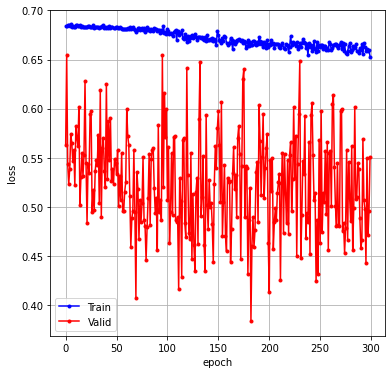

In [28]:
y_loss = history.history['loss']
val_loss = history.history['val_loss']

x_len = np.arange(len(y_loss))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_loss, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_loss, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

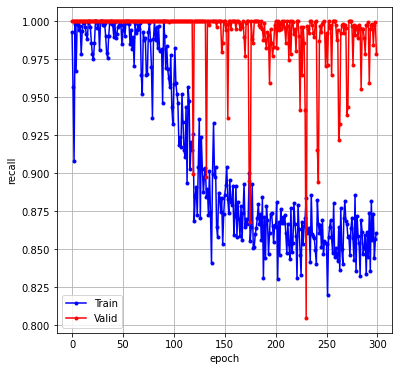

In [29]:
y_recall = history.history['recall']
val_recall = history.history['val_recall']

x_len = np.arange(len(y_recall))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_recall, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_recall, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("recall")
plt.show()

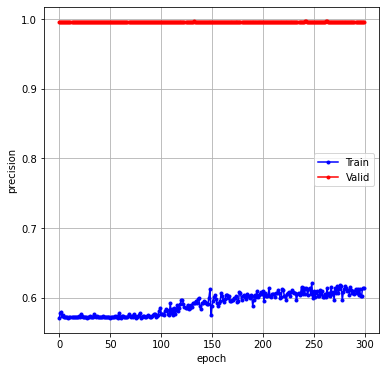

In [30]:
y_precision = history.history['precision']
val_precision = history.history['val_precision']

x_len = np.arange(len(y_recall))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_precision, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_precision, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("precision")
plt.show()

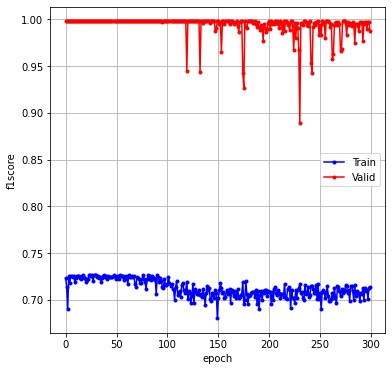

In [31]:
y_f1score = history.history['f1score']
val_f1score = history.history['val_f1score']

x_len = np.arange(len(y_recall))

plt.figure(figsize = (6,6))
plt.plot(x_len, y_f1score, marker = '.',c = 'blue', label = 'Train')
plt.plot(x_len, val_f1score, marker = '.',c = 'red', label = 'Valid')
plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("f1score")
plt.show()

In [32]:
model.save("model_e.h5")

/home/bgw2001/anaconda3/envs/py3.8/lib/python3.8/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
